In [17]:
import pandas as pd
import time
import numpy as np

In [2]:
sales_data = pd.read_csv('/Users/guybasson/Desktop/sdatta-nlp/palmers_fashion/f_sales_v_fashion.csv')
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data['item'] = sales_data['sku'].astype(str)
sales_data['store'] = sales_data['store'].astype(str)
sales_data = sales_data.rename(columns={'total_sales':'sales'})
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990977 entries, 0 to 4990976
Data columns (total 7 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   sku                      int64         
 1   store                    object        
 2   date                     datetime64[ns]
 3   average_price            float64       
 4   average_dicounted_price  float64       
 5   sales                    float64       
 6   item                     object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 266.5+ MB


In [3]:
warehouse_data = pd.read_csv('/Users/guybasson/Desktop/sdatta-nlp/palmers_fashion/warehouse_stock_fashion.csv')
warehouse_data['valid_to_date'] = warehouse_data['valid_to_date'].replace('2099-12-31', sales_data['date'].max().strftime('%Y-%m-%d'))

In [4]:
warehouse_data['valid_to_date'].max()

'2023-12-12'

In [5]:
mbew_fashion = pd.read_csv('mbew_fashion.csv')
mbew_fashion['valid_to_date'] = mbew_fashion['valid_to_date'].replace('2099-12-31', sales_data['date'].max().strftime('%Y-%m-%d'))
mbew_fashion['valid_to_date'] = pd.to_datetime(mbew_fashion['valid_to_date'])
mbew_fashion['valid_from_date'] = pd.to_datetime(mbew_fashion['valid_from_date'])
mbew_fashion['item'] = mbew_fashion['sku'].astype(str).str[:12]
mbew_fashion

,store,sku,valid_from_date,valid_to_date,stock,item
0,123,100549055000004,2017-04-21,2023-12-12,0.0,100549055000
1,89,100532175000001,2017-04-21,2023-12-12,0.0,100532175000
2,43,100553018000001,2017-04-21,2023-12-12,0.0,100553018000
3,104,100548169000007,2017-04-21,2023-12-12,0.0,100548169000
4,85,100549049000003,2017-04-21,2023-12-12,0.0,100549049000
...,...,...,...,...,...,...
17812117,18,100552850000002,2020-05-07,2023-12-12,0.0,100552850000
17812118,99,100653096000013,2020-05-07,2020-08-14,1.0,100653096000
17812119,46,100557049000004,2018-11-17,2023-12-12,0.0,100557049000
17812120,8,100511203000004,2017-04-21,2023-12-12,0.0,100511203000


In [6]:
mbew_fashion_no_zero = mbew_fashion[mbew_fashion['stock'] > 0]
mbew_fashion_no_zero['valid_from_date'] = pd.to_datetime(mbew_fashion_no_zero['valid_from_date'])
dict_of_first_month_date_for_sku = {}
i= 0
for sku in mbew_fashion_no_zero['sku'].unique():
    i+=1
    print(str(i) + ' out of ' + str(len(mbew_fashion_no_zero['sku'].unique())))
    data_ = mbew_fashion_no_zero[mbew_fashion_no_zero['sku'] == sku]
    first_date = data_['valid_from_date'].min()
    # put the month in the dict from the first date
    dict_of_first_month_date_for_sku[sku] =  first_date.strftime('%m/%y')

/var/folders/sv/p02my_xx7t193mwjyb2ytt040000gn/T/ipykernel_9726/154987957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mbew_fashion_no_zero['valid_from_date'] = pd.to_datetime(mbew_fashion_no_zero['valid_from_date'])


1 out of 25843
2 out of 25843
3 out of 25843
4 out of 25843
5 out of 25843
6 out of 25843
7 out of 25843
8 out of 25843
9 out of 25843
10 out of 25843
11 out of 25843
12 out of 25843
13 out of 25843
14 out of 25843
15 out of 25843
16 out of 25843
17 out of 25843
18 out of 25843
19 out of 25843
20 out of 25843
21 out of 25843
22 out of 25843
23 out of 25843
24 out of 25843
25 out of 25843
26 out of 25843
27 out of 25843
28 out of 25843
29 out of 25843
30 out of 25843
31 out of 25843
32 out of 25843
33 out of 25843
34 out of 25843
35 out of 25843
36 out of 25843
37 out of 25843
38 out of 25843
39 out of 25843
40 out of 25843
41 out of 25843
42 out of 25843
43 out of 25843
44 out of 25843
45 out of 25843
46 out of 25843
47 out of 25843
48 out of 25843
49 out of 25843
50 out of 25843
51 out of 25843
52 out of 25843
53 out of 25843
54 out of 25843
55 out of 25843
56 out of 25843
57 out of 25843
58 out of 25843
59 out of 25843
60 out of 25843
61 out of 25843
62 out of 25843
63 out of 25843
6


KeyboardInterrupt



In [ ]:
# take MM/YY from first date
first_date.strftime('%m/%y')


In [ ]:
dict_of_first_day_for_sku

In [ ]:
print(sales_data)

In [7]:
strong_sku = sales_data.groupby(['sku'])['sales'].sum().sort_values(ascending=False).reset_index()

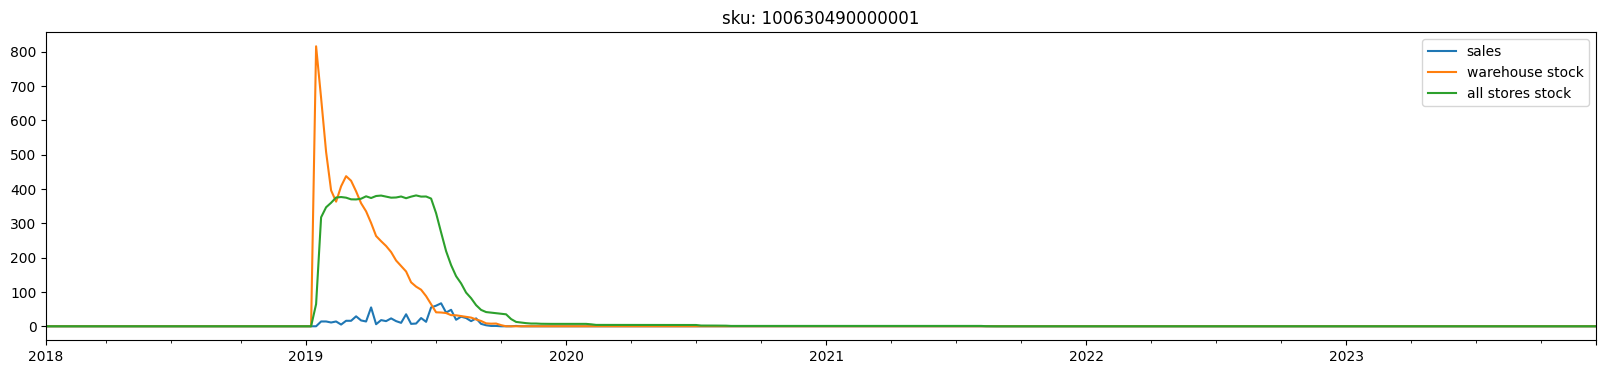

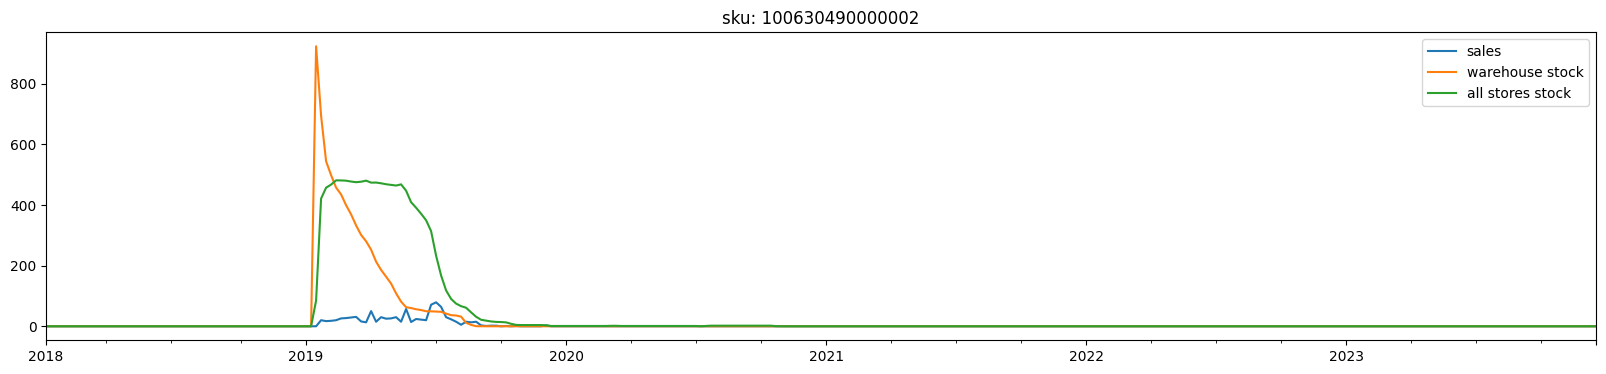

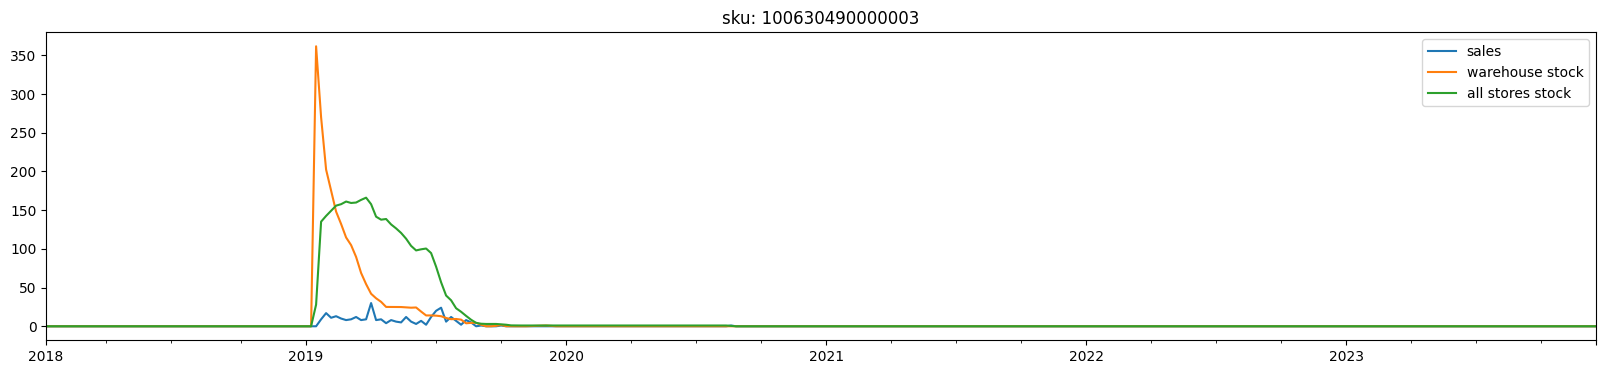

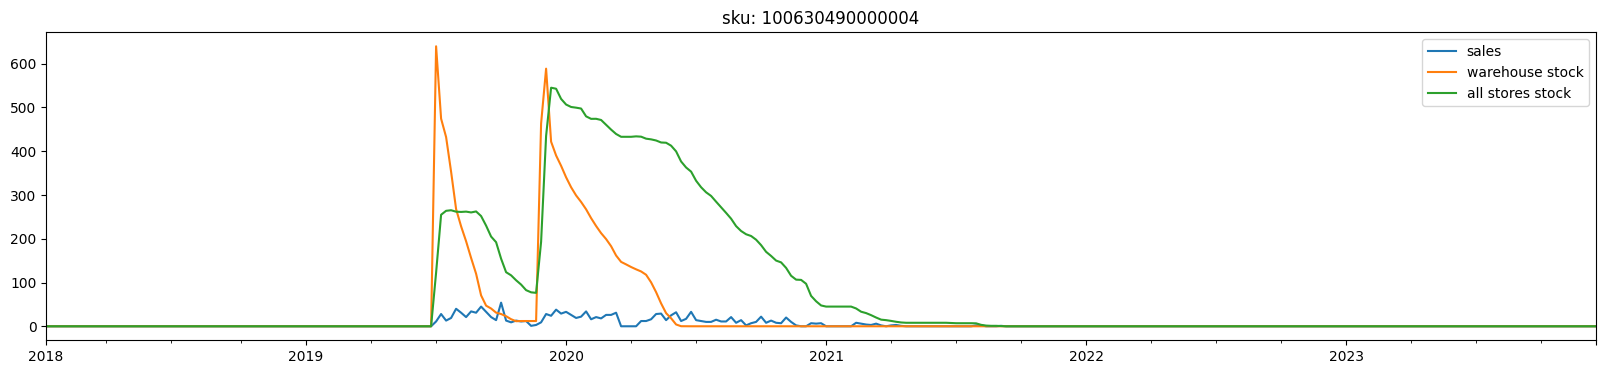

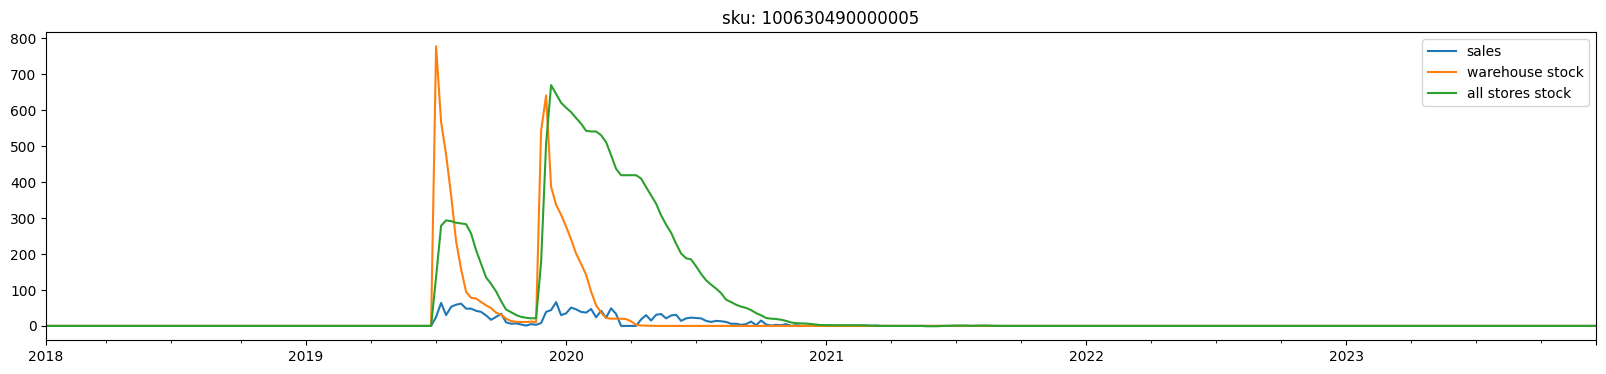

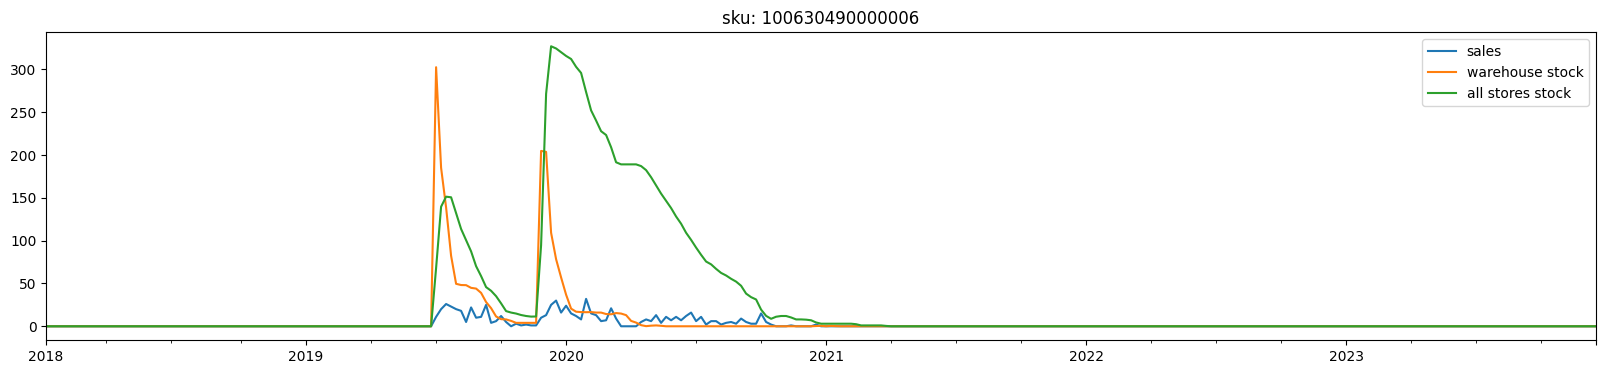

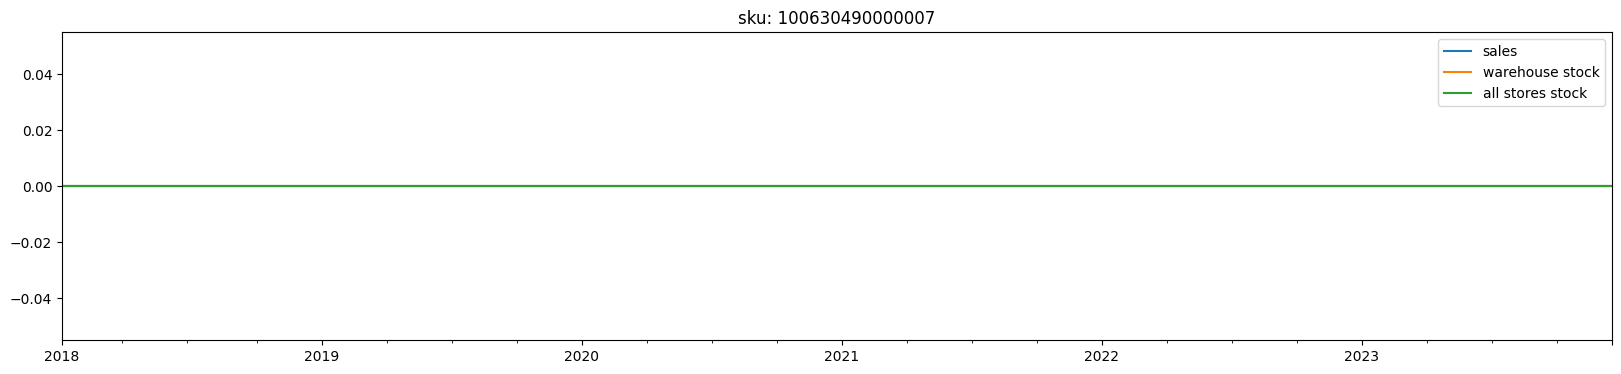

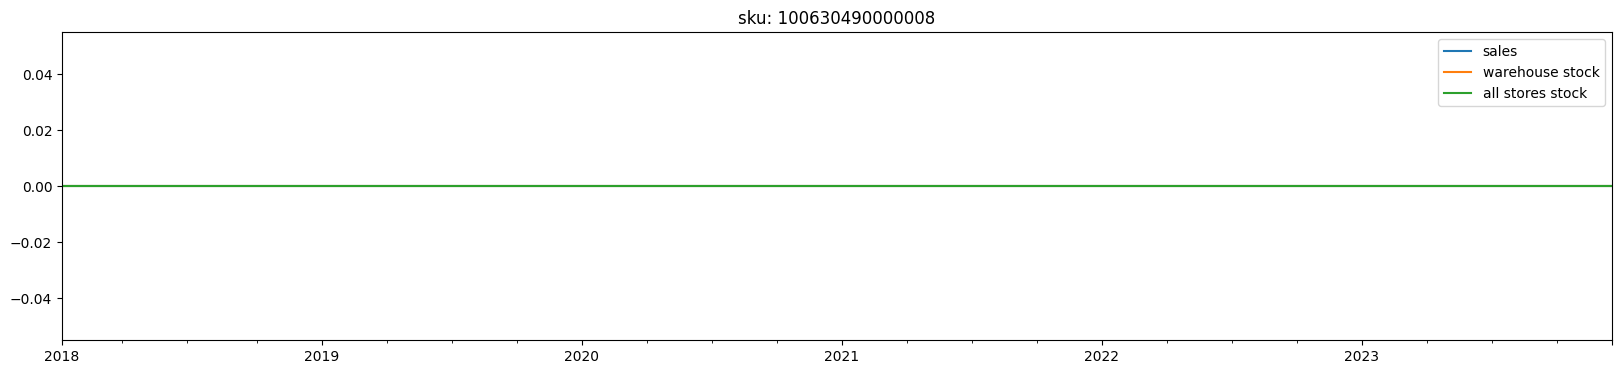

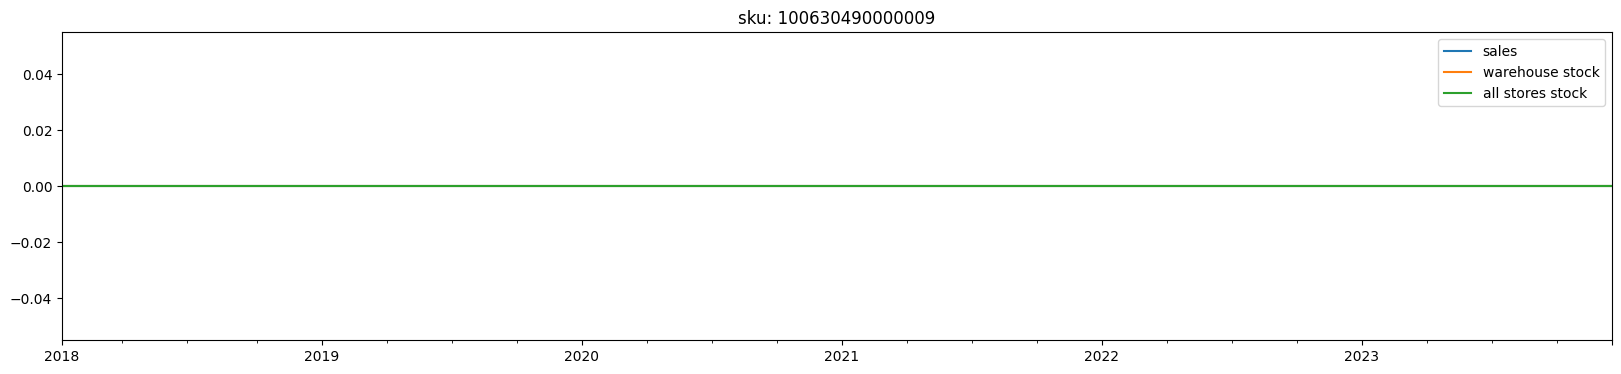

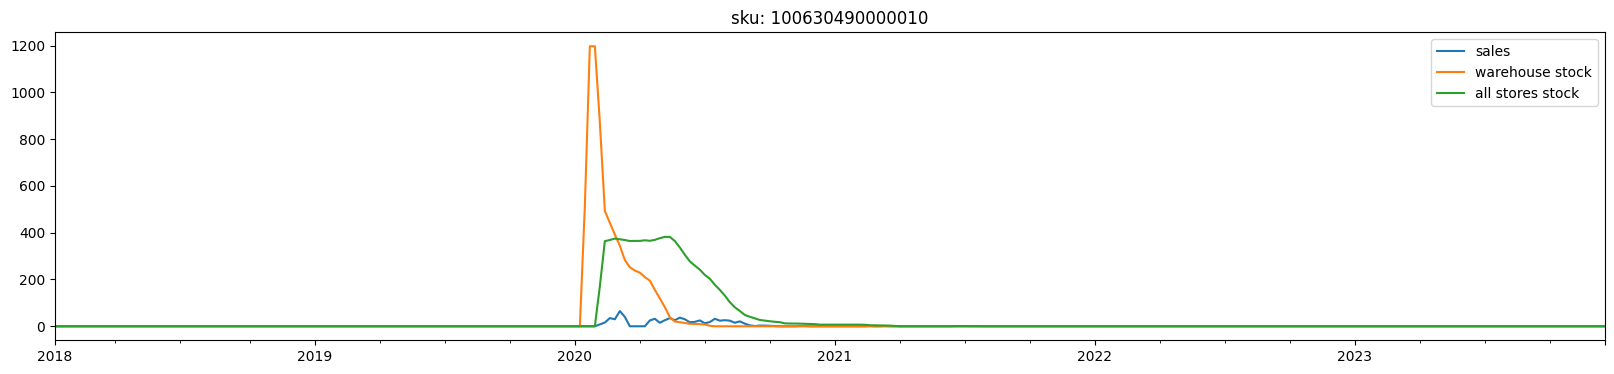

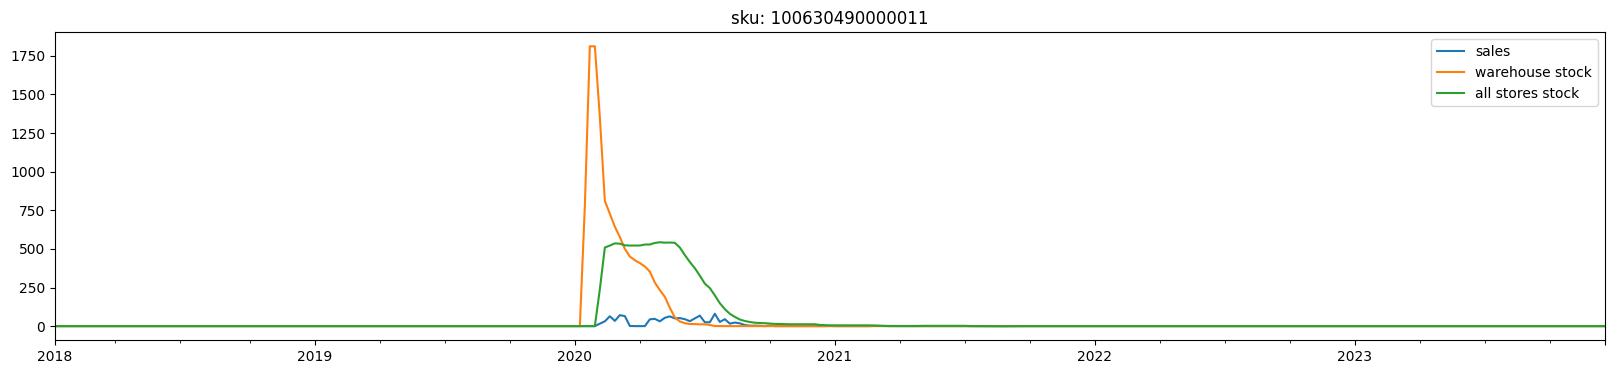

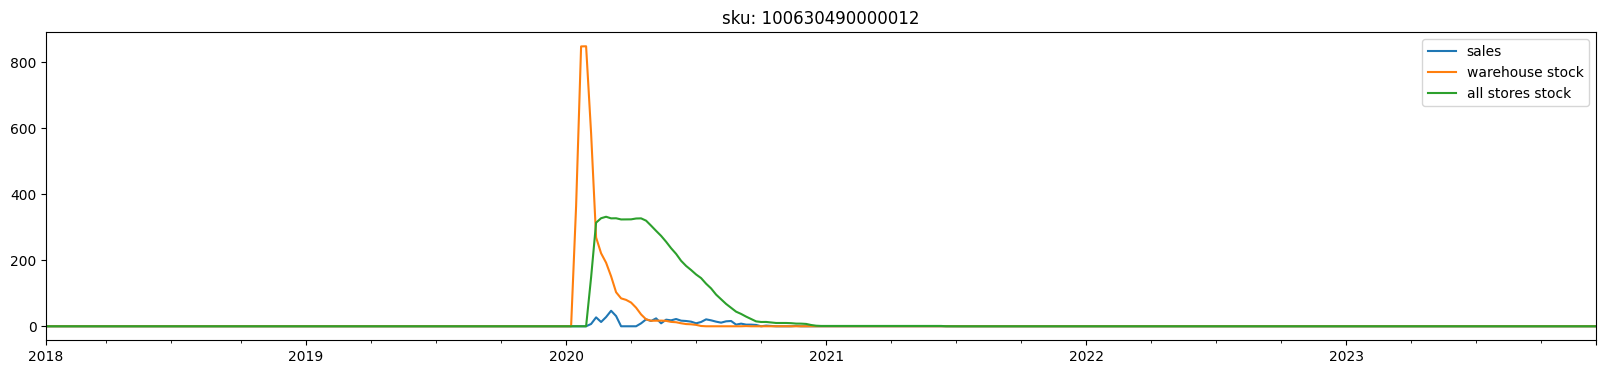

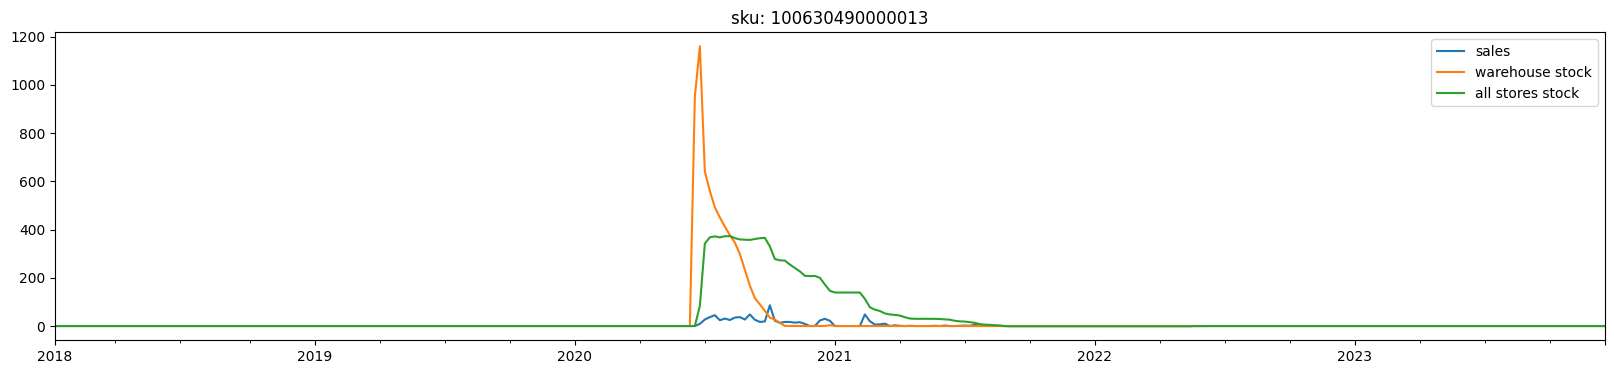

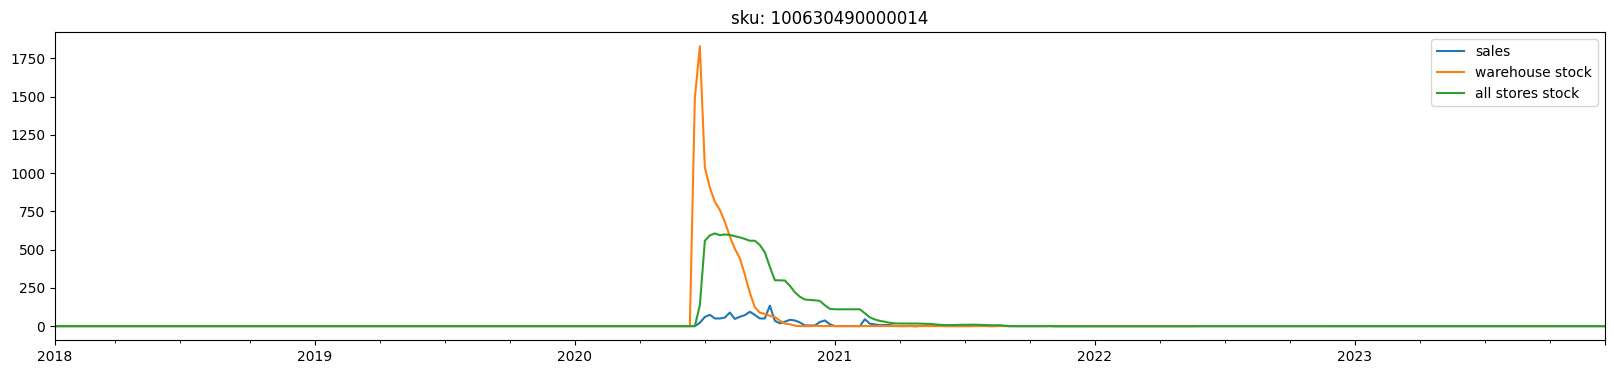

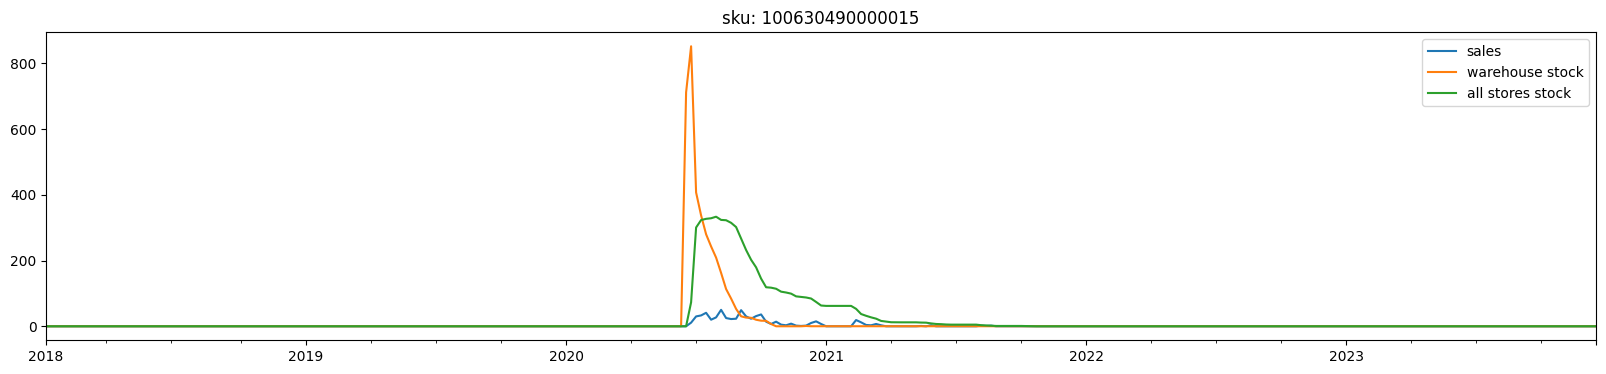

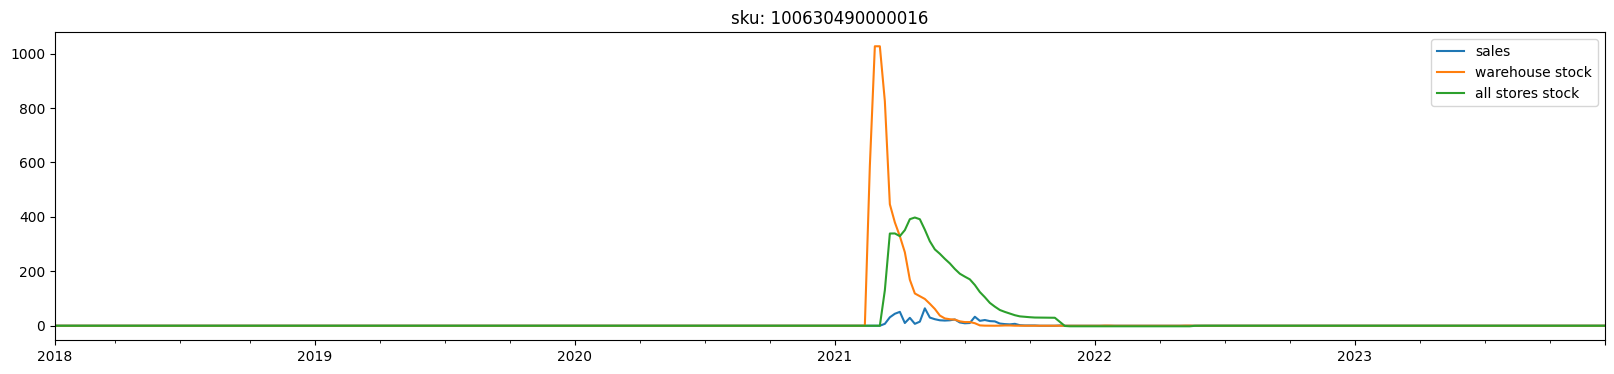

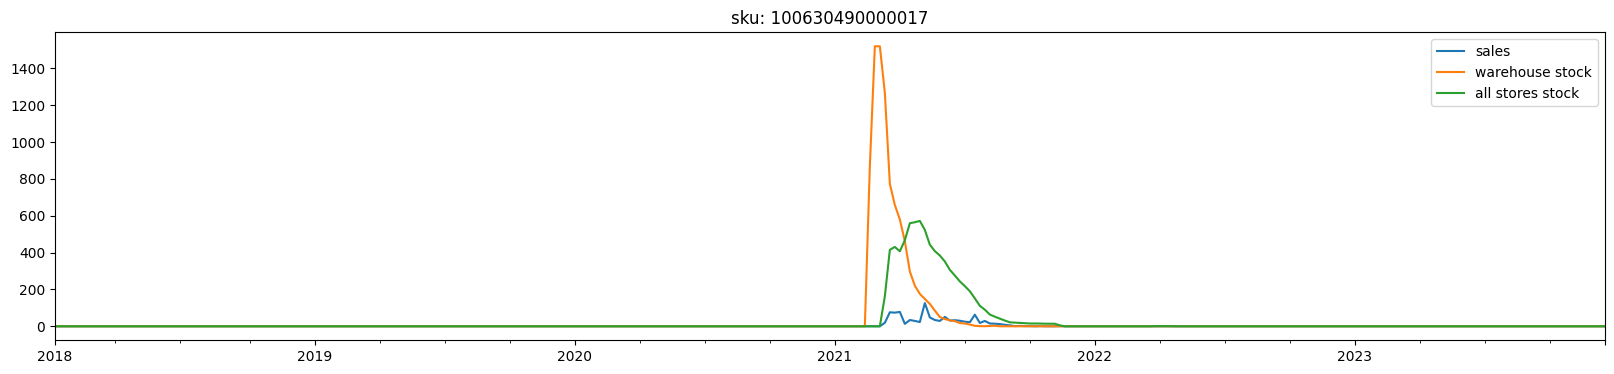

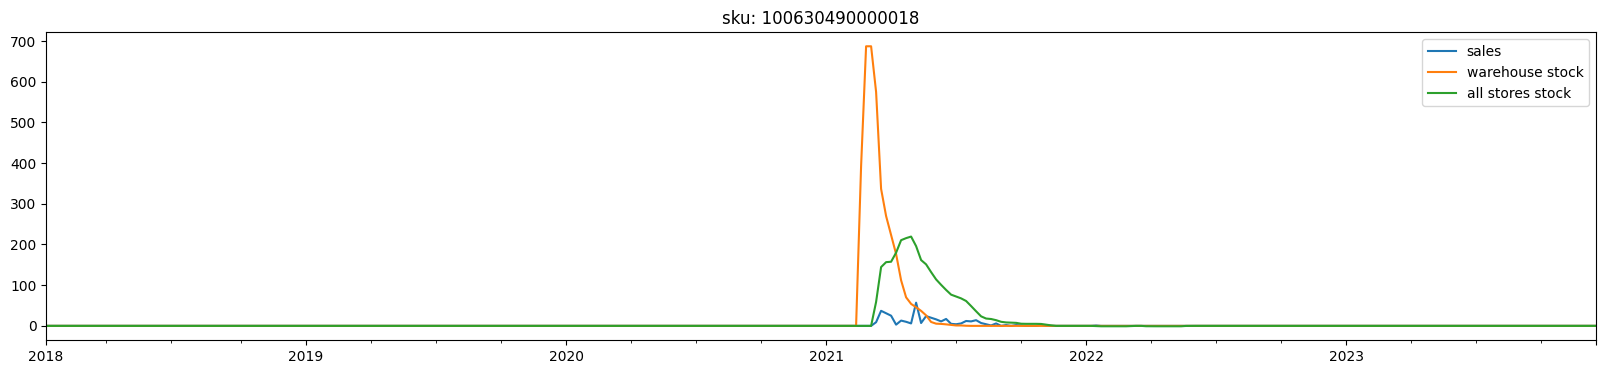

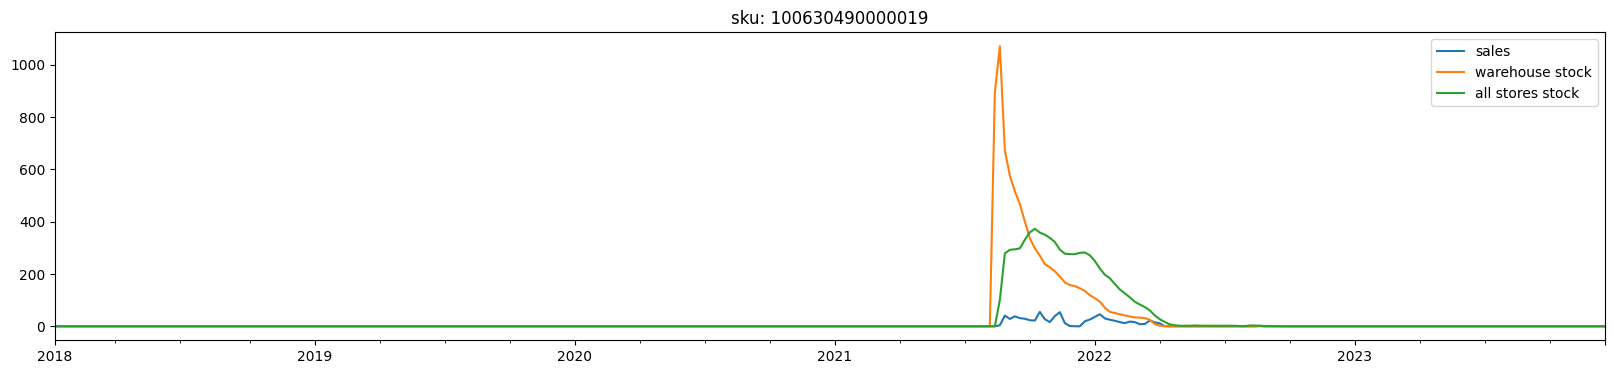

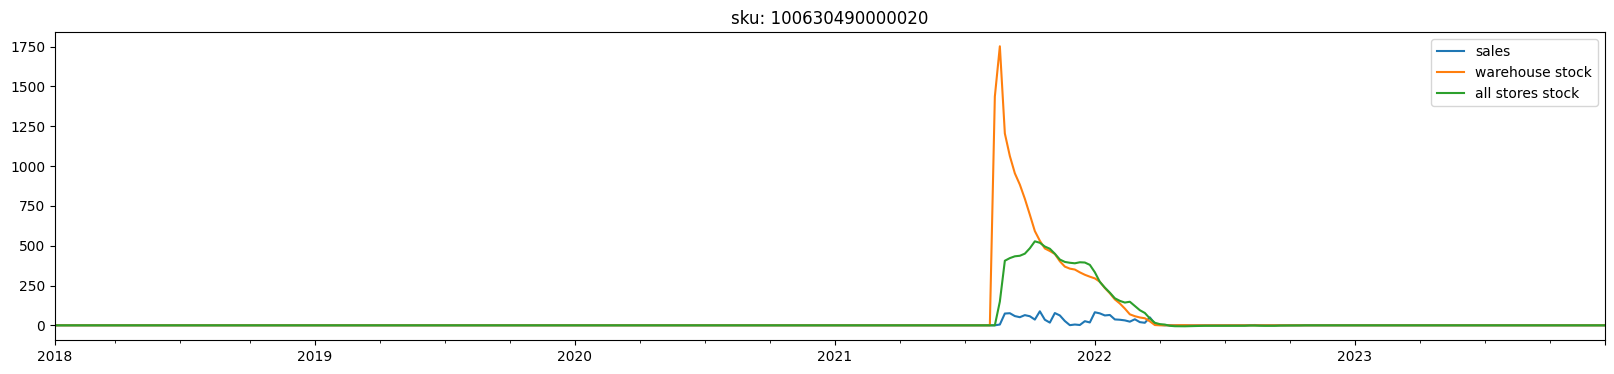

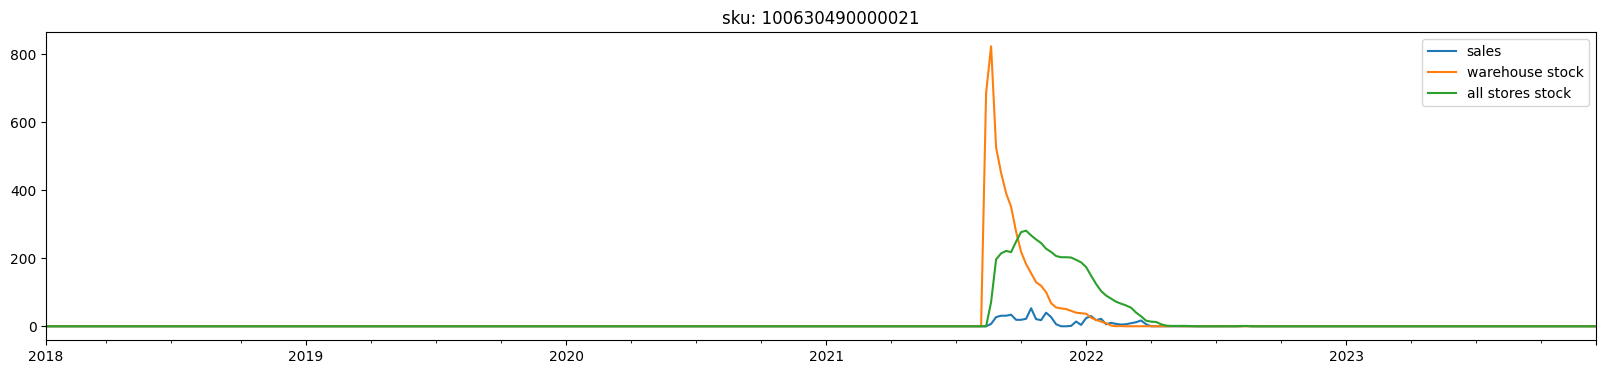

In [8]:
import matplotlib.pyplot as plt
for sku in [100630490000001, 100630490000002, 100630490000003, 100630490000004, 100630490000005, 100630490000006, 100630490000007, 100630490000008, 100630490000009, 100630490000010, 100630490000011, 100630490000012, 100630490000013, 100630490000014, 100630490000015, 100630490000016, 100630490000017, 100630490000018, 100630490000019, 100630490000020, 100630490000021,]:
    sku_data = sales_data[sales_data['sku'] == sku].groupby('date')['sales'].sum()
    sku_data = sku_data.reindex(pd.date_range(start=sales_data['date'].min(),
                                                # today
                                                end=sales_data['date'].max(),

                                                freq='D')).fillna(0)
    sku_warehouse = warehouse_data[warehouse_data['sku'].astype(str) == str(sku)].sort_values(by='valid_from_date')
    sku_warehouse_df_final = pd.DataFrame()
    for row in sku_warehouse.iterrows():
        sku_warehouse_df_final = pd.concat([sku_warehouse_df_final, pd.DataFrame({'date':pd.date_range(start=row[1]['valid_from_date'], end=row[1]['valid_to_date'], freq='D'), 'warehouse stock':row[1]['stock']})])
    sku_warehouse_df_final = sku_warehouse_df_final.set_index('date')
    relevant_sku_stores_stock = mbew_fashion[mbew_fashion['sku'] == sku]
    all_stores_sku_stock_data = {}
    for store in relevant_sku_stores_stock['store'].unique():
        store_sku_data = relevant_sku_stores_stock[relevant_sku_stores_stock['store'] == store]
        one_store_stock_sku_all = pd.DataFrame()
        for row in store_sku_data.iterrows():
            one_store_stock_sku = pd.DataFrame({'date':pd.date_range(start=row[1]['valid_from_date'],
                                                                     end=row[1]['valid_to_date'],
                                                                     freq='D'),
                                                'store stock':row[1]['stock']})
            one_store_stock_sku_all = pd.concat([one_store_stock_sku_all, one_store_stock_sku])
        one_store_stock_sku_all = one_store_stock_sku_all.set_index('date')
        all_stores_sku_stock_data[store] = one_store_stock_sku_all
        # merge all stores with outer join
    all_stores_final_stock_data = pd.DataFrame()
    for store in all_stores_sku_stock_data.keys():
        relevant_store_data_1 = all_stores_sku_stock_data[store]
        relevant_store_data_1 = relevant_store_data_1.rename(columns={'store stock':'store {}'.format(store) + ' stock'})
        all_stores_final_stock_data = pd.concat([all_stores_final_stock_data, relevant_store_data_1], axis=1, join='outer')
    all_store_sum_stock = all_stores_final_stock_data.sum(axis=1).to_frame().rename(columns={0:'all stores stock'})
    # merge by index
    sku_data = pd.merge(sku_data, sku_warehouse_df_final, left_index=True, right_index=True, how='left').fillna(0)
    sku_data = pd.merge(sku_data, all_store_sum_stock, left_index=True, right_index=True, how='left').fillna(0)
    sku_data_w = sku_data.resample('W').agg({'sales':'sum', 'warehouse stock':'mean', 'all stores stock':'mean'})
    sku_data_w.plot(figsize=(20,4))
    plt.title('sku: ' + str(sku))

    plt.show()

In [9]:
sku_warehouse = warehouse_data[warehouse_data['sku'].astype(str) == str(sku)].sort_values(by='valid_from_date')

In [10]:
sales_data['sku_store'] = sales_data['sku'].astype(str) + ',' + sales_data['store'].astype(str)
mbew_fashion['sku_store'] = mbew_fashion['sku'].astype(str) + ',' + mbew_fashion['store'].astype(str)

In [14]:
import numpy as np
import time

start_time = time.time()
mbew_fashion = mbew_fashion.sort_values('valid_from_date')

for store in sales_data['store'].unique():
    print("store:", store)
    len_of_store = sales_data[sales_data['store'] == store]["sku_store"].nunique()

    unique_sku_stores =  sales_data[sales_data['store'] == store]["sku_store"].unique()

    mbew_fashion['valid_from_date'] = pd.to_datetime(mbew_fashion['valid_from_date'])
    mbew_fashion['valid_to_date'] = pd.to_datetime(mbew_fashion['valid_to_date'])
    filtered_mbew_fashion = mbew_fashion[mbew_fashion['sku_store'].isin(unique_sku_stores)]

    # Function to generate date ranges
    def generate_date_ranges(row):
        return pd.date_range(row['valid_from_date'], row['valid_to_date'])

    # Apply function to create date ranges
    df_all_2 = filtered_mbew_fashion.apply(generate_date_ranges, axis=1)

    # Create DataFrame with SKU-store and dates
    df_all_2 = pd.DataFrame({
        'sku_store': np.repeat(filtered_mbew_fashion['sku_store'].values, df_all_2.str.len()),
        'date': np.concatenate(df_all_2.values)  # Convert DatetimeIndex to array for concatenation
    })
    # merge left by ['sku_store', 'date'] and right by ['sku_store', 'valid_to_date']
    df_all_2 = pd.merge(df_all_2, filtered_mbew_fashion[['sku_store','valid_from_date', 'stock']], left_on=['sku_store', 'date'], right_on=['sku_store', 'valid_from_date'], how='left')
    # ffil stock
    df_all_2['stock'] = df_all_2['stock'].ffill()
    df_all_2 = df_all_2.drop(columns=['valid_from_date'])
    df_all_2 = pd.merge(sales_data, df_all_2, on=["sku_store","date"], how="right")
    df_all_2['sku'] = df_all_2['sku_store'].str.split(',').str[0]
    df_all_2['store'] = df_all_2['sku_store'].str.split(',').str[1]
    df_all_2['item'] = df_all_2['sku'].astype(str).str[:12]
    df_all_2['sales'] = df_all_2['sales'].fillna(0)
    df_all_2.to_parquet("df_all_store_{}.parquet".format(store))

print("--- %s seconds ---" % (time.time() - start_time))

store: 76



KeyboardInterrupt



# generate warehouse data

In [28]:
sku_unique_in_sales = sales_data['sku'].unique()

In [34]:
print(warehouse_data[warehouse_data['sku'].isin([100642246000001])])

      store              sku valid_from_date valid_to_date  stock  \
60441  VZ01  100642246000001      2023-02-02    2023-03-22    0.0   
64592  VZ01  100642246000001      2023-03-23    2023-04-05  439.0   
65653  VZ01  100642246000001      2023-04-06    2023-04-06  356.0   
65741  VZ01  100642246000001      2023-04-07    2023-04-07  251.0   
65850  VZ01  100642246000001      2023-04-08    2023-04-11  238.0   
65962  VZ01  100642246000001      2023-04-12    2023-04-12  224.0   
66086  VZ01  100642246000001      2023-04-13    2023-04-13  221.0   
66182  VZ01  100642246000001      2023-04-14    2023-04-14  212.0   
66293  VZ01  100642246000001      2023-04-15    2023-04-17  210.0   
66444  VZ01  100642246000001      2023-04-18    2023-04-18  207.0   
66502  VZ01  100642246000001      2023-04-19    2023-04-21  204.0   
66833  VZ01  100642246000001      2023-04-22    2023-04-24  198.0   
67022  VZ01  100642246000001      2023-04-25    2023-04-25  196.0   
67134  VZ01  100642246000001      

In [29]:

start_time = time.time()
warehouse_data['valid_from_date'] = pd.to_datetime(warehouse_data['valid_from_date'])
warehouse_data['valid_to_date'] = pd.to_datetime(warehouse_data['valid_to_date'])
warehouse_data = warehouse_data.sort_values('valid_from_date')
warehouse_data['sku_store'] = warehouse_data['sku'].astype(str) + ',' + warehouse_data['store'].astype(str)
warehouse_data_sample = warehouse_data[warehouse_data['sku'].isin(sku_unique_in_sales)]
for store in ['VZ01']:
    print("store:", store)

    warehouse_data_sample['valid_from_date'] = pd.to_datetime(warehouse_data_sample['valid_from_date'])
    warehouse_data_sample['valid_to_date'] = pd.to_datetime(warehouse_data_sample['valid_to_date'])
    filtered_warehouse_data = warehouse_data_sample

    # Function to generate date ranges
    def generate_date_ranges(row):
        return pd.date_range(row['valid_from_date'], row['valid_to_date'])

    # Apply function to create date ranges
    df_all_2 = filtered_warehouse_data.apply(generate_date_ranges, axis=1)

    # Create DataFrame with SKU-store and dates
    df_all_2 = pd.DataFrame({
        'sku': np.repeat(filtered_warehouse_data['sku'].values, df_all_2.str.len()),
        'date': np.concatenate(df_all_2.values)  # Convert DatetimeIndex to array for concatenation
    })
    df_all_2 = pd.merge(df_all_2, filtered_warehouse_data[['sku','valid_from_date', 'stock']], left_on=['sku', 'date'], right_on=['sku', 'valid_from_date'], how='left')
    # ffil stock
    df_all_2['stock'] = df_all_2['stock'].ffill()
  #  df_all_2 = df_all_2.rename(columns={'stock':'warehouse stock'})
    df_all_2 = df_all_2.drop(columns=['valid_from_date'])

    df_all_2.to_parquet("df_all_store_{}.parquet".format(store))

print("--- %s seconds ---" % (time.time() - start_time))

store: VZ01


/var/folders/sv/p02my_xx7t193mwjyb2ytt040000gn/T/ipykernel_10405/1726283146.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warehouse_data_sample['valid_from_date'] = pd.to_datetime(warehouse_data_sample['valid_from_date'])
/var/folders/sv/p02my_xx7t193mwjyb2ytt040000gn/T/ipykernel_10405/1726283146.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warehouse_data_sample['valid_to_date'] = pd.to_datetime(warehouse_data_sample['valid_to_date'])


--- 92.53727269172668 seconds ---


In [22]:
df_all_2.to_parquet("df_all_store_{}.parquet".format(store))

In [23]:
df_all_2['sku_store'].unique()

KeyError: 'sku_store'

In [26]:
df_all_2

,sku,date,stock
0,205612233000001,2010-07-31,0.0
1,205612233000001,2010-08-01,0.0
2,205612233000001,2010-08-02,0.0
3,205612233000001,2010-08-03,0.0
4,205612233000001,2010-08-04,0.0
...,...,...,...
4878,205612233000001,2023-12-08,0.0
4879,205612233000001,2023-12-09,0.0
4880,205612233000001,2023-12-10,0.0
4881,205612233000001,2023-12-11,0.0


In [25]:
warehouse_data_sample[warehouse_data_sample['sku'] == '100657013000006']

,store,sku,valid_from_date,valid_to_date,stock,sku_store


In [17]:
unique_sku_stores

array([], dtype=object)

In [16]:
df_all_2

,store,sku,valid_from_date,valid_to_date,stock,item,sku_store


In [11]:
df_all_2

,sku,store,date,average_price,average_dicounted_price,sales,item,sku_store,stock
0,100090812000001,100,2017-02-12,NaN,NaN,0.0,100090812000,"100090812000001,100",0.0
1,100090812000001,100,2017-02-13,NaN,NaN,0.0,100090812000,"100090812000001,100",0.0
2,100090812000001,100,2017-02-14,NaN,NaN,0.0,100090812000,"100090812000001,100",0.0
3,100090812000001,100,2017-02-15,NaN,NaN,0.0,100090812000,"100090812000001,100",0.0
4,100090812000001,100,2017-02-16,NaN,NaN,0.0,100090812000,"100090812000001,100",0.0
...,...,...,...,...,...,...,...,...,...
27720755,100618581000001,100,2023-12-12,NaN,NaN,0.0,100618581000,"100618581000001,100",1.0
27720756,100648053000003,100,2023-12-12,NaN,NaN,0.0,100648053000,"100648053000003,100",7.0
27720757,100652301000002,100,2023-12-12,NaN,NaN,0.0,100652301000,"100652301000002,100",5.0
27720758,100635022000002,100,2023-12-12,NaN,NaN,0.0,100635022000,"100635022000002,100",4.0


In [12]:
mbew_fashion[mbew_fashion['sku_store'] == '100090812000001,100']

,store,sku,valid_from_date,valid_to_date,stock,item,sku_store
12435481,100,100090812000001,2017-02-12,2019-04-24,0.0,100090812000,"100090812000001,100"
12501110,100,100090812000001,2019-04-25,2019-08-01,2.0,100090812000,"100090812000001,100"
12501365,100,100090812000001,2019-08-02,2019-08-13,2.0,100090812000,"100090812000001,100"
12521710,100,100090812000001,2019-08-14,2019-09-07,1.0,100090812000,"100090812000001,100"
12541579,100,100090812000001,2019-09-08,2023-12-12,0.0,100090812000,"100090812000001,100"


In [13]:
df_all_2[df_all_2['sku_store'] == '100090812000001,100']

,sku,store,date,average_price,average_dicounted_price,sales,item,sku_store,stock
0,100090812000001,100,2017-02-12,NaN,NaN,0.0,100090812000,"100090812000001,100",0.0
1,100090812000001,100,2017-02-13,NaN,NaN,0.0,100090812000,"100090812000001,100",0.0
2,100090812000001,100,2017-02-14,NaN,NaN,0.0,100090812000,"100090812000001,100",0.0
3,100090812000001,100,2017-02-15,NaN,NaN,0.0,100090812000,"100090812000001,100",0.0
4,100090812000001,100,2017-02-16,NaN,NaN,0.0,100090812000,"100090812000001,100",0.0
...,...,...,...,...,...,...,...,...,...
13059372,100090812000001,100,2023-12-08,NaN,NaN,0.0,100090812000,"100090812000001,100",0.0
13059373,100090812000001,100,2023-12-09,NaN,NaN,0.0,100090812000,"100090812000001,100",0.0
13059374,100090812000001,100,2023-12-10,NaN,NaN,0.0,100090812000,"100090812000001,100",0.0
13059375,100090812000001,100,2023-12-11,NaN,NaN,0.0,100090812000,"100090812000001,100",0.0


In [ ]:
warehouse_data.info()

In [ ]:
sku_warehouse_df_final

In [ ]:
print(100630490000005)

In [ ]:
sku_data